# Diagnóstico Visual de Doenças Cardíacas

## Cenário (O Problema)
Você é um(a) Cientista de Dados em uma clínica de cardiologia e recebeu a tarefa de identificar padrões de risco de doença cardíaca utilizando o conjunto de dados heart.csv. O objetivo é auxiliar os médicos no diagnóstico rápido, transformando dados brutos em insights visuais claros e acionáveis. Sua entrega final será um notebook com 8 visualizações distintas que contam uma história sobre os fatores de risco.

## Tarefa: Análise Exploratória e Visualização Avançada
O desafio é ir além dos gráficos básicos e utilizar os recursos avançados de Matplotlib, Seaborn e Plotly para responder a questões complexas sobre a relação entre variáveis clínicas e a presença de doença cardíaca (output).

## Requisitos de Análise (Mínimo de 8 Gráficos Requeridos)
Vocês devem utilizar cada uma das três bibliotecas pelo menos uma vez e escolher análises que não foram abordadas na aula (por exemplo, explore relações entre outras variáveis).

1. Comparação da Distribuição de Idade e Colesterol por Doença;
2. Relação entre Pressão Arterial e Tipo de Dor no Peito;
3. Gere um sns.heatmap para visualizar a matriz de correlação de todas as variáveis numéricas;
4. Utilize um sns.FacetGrid combinado com um sns.kdeplot para visualizar a distribuição da Frequência Cardíaca Máxima (thalachh), separando o gráfico por sex (sexo) e exng (angina induzida por exercício).
5. Crie um plotly.express.scatter_3d com as seguintes variáveis:
  - Eixo X: chol (Colesterol)
  - Eixo Y: thalachh (Frequência Cardíaca Máxima)
  - Eixo Z: oldpeak (Depressão do ST)

Pergunta: Gire o gráfico e identifique se a doença cardíaca é separável em um espaço tridimensional por essas três variáveis.

6. Crie um plotly.express.bar para visualizar a contagem de pacientes por restecg (eletrocardiograma em repouso), e utilize o parâmetro color para diferenciar a variável alvo (output).
7. Crie um plotly.express.sunburst ou plotly.express.treemap para visualizar a hierarquia e a contagem de pacientes que têm ou não doença cardíaca (output) com base em dois fatores categóricos: sex e fbs (açúcar no sangue em jejum).
8. Utilize a biblioteca de sua preferência para criar um Boxen Plot (sns.boxenplot) ou um gráfico de Raincloud (se souber implementar ou usar uma extensão), focando na variável age (idade) agrupada por caa (número de vasos principais).

### 1. Comparação da Distribuição de Idade e Colesterol por Doença;

/tmp/ipython-input-622153144.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="output", y="age", palette="Set2")
/tmp/ipython-input-622153144.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="output", y="chol", palette="Set3")


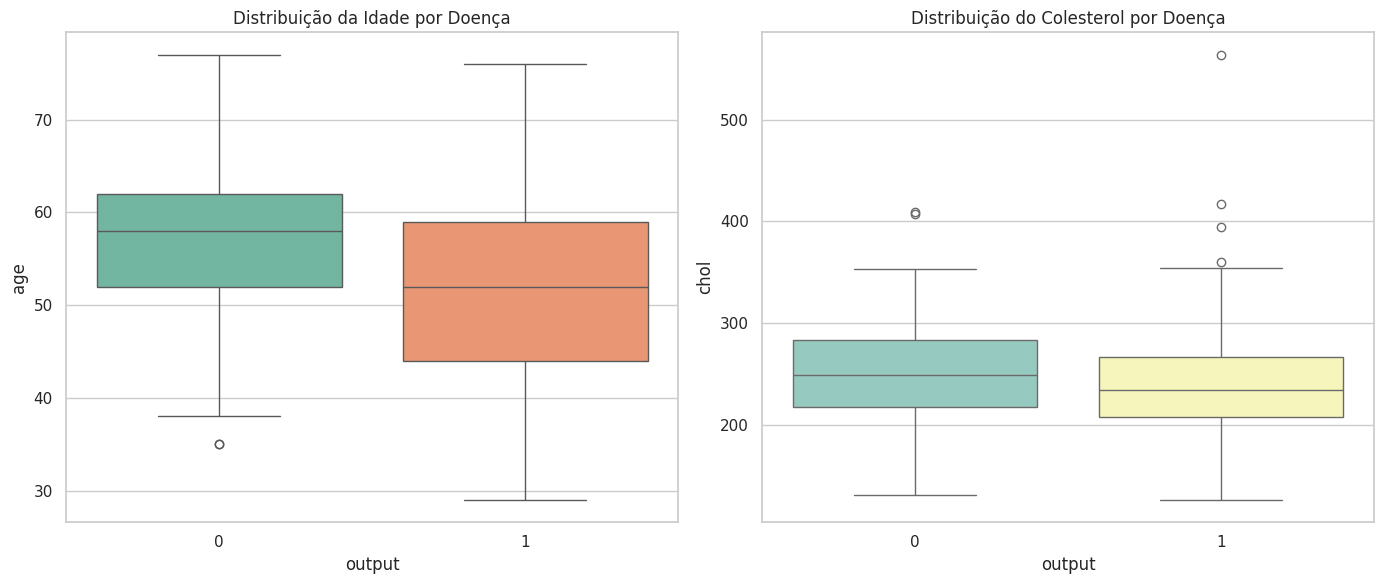

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv("/heart.csv")
sns.set_theme(style="whitegrid")

####
# Resposta

plt.figure(figsize=(14,6))

# Idade por doença
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="output", y="age", palette="Set2")
plt.title("Distribuição da Idade por Doença")

# Colesterol por doença
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="output", y="chol", palette="Set3")
plt.title("Distribuição do Colesterol por Doença")

plt.tight_layout()
plt.show()



### 2. Relação entre Pressão Arterial e Tipo de Dor no Peito;

/tmp/ipython-input-4024737040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="cp", y="trtbps", palette="Set1")


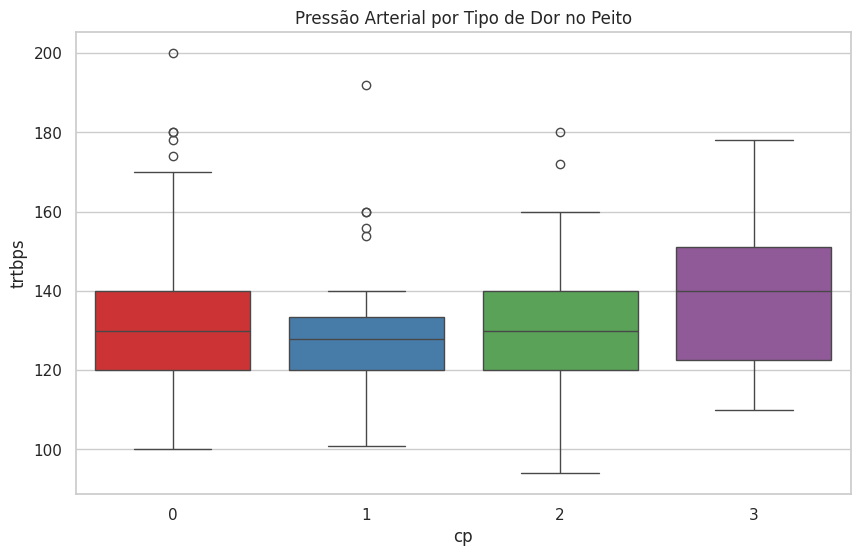

In [4]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="cp", y="trtbps", palette="Set1")
plt.title("Pressão Arterial por Tipo de Dor no Peito")
plt.show()


### 3. Gere um sns.heatmap para visualizar a matriz de correlação de todas as variáveis numéricas;

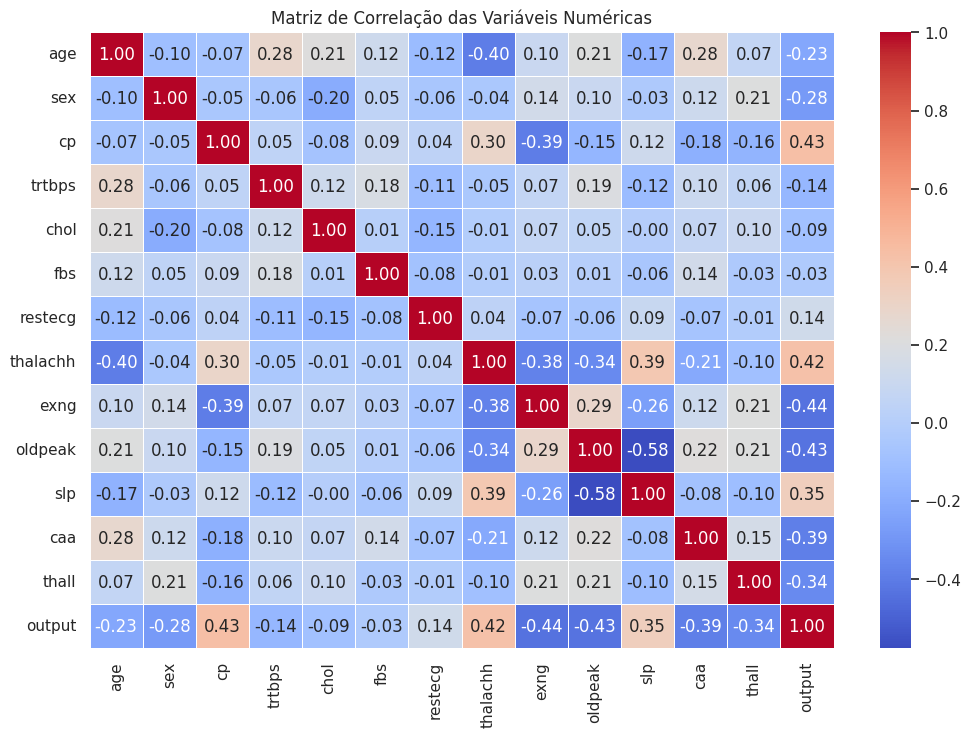

In [5]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    linewidths=.5,
    fmt=".2f"
)

plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()


### 4. Utilize um sns.FacetGrid combinado com um sns.kdeplot para visualizar a distribuição da Frequência Cardíaca Máxima (thalachh), separando o gráfico por sex (sexo) e exng (angina induzida por exercício).

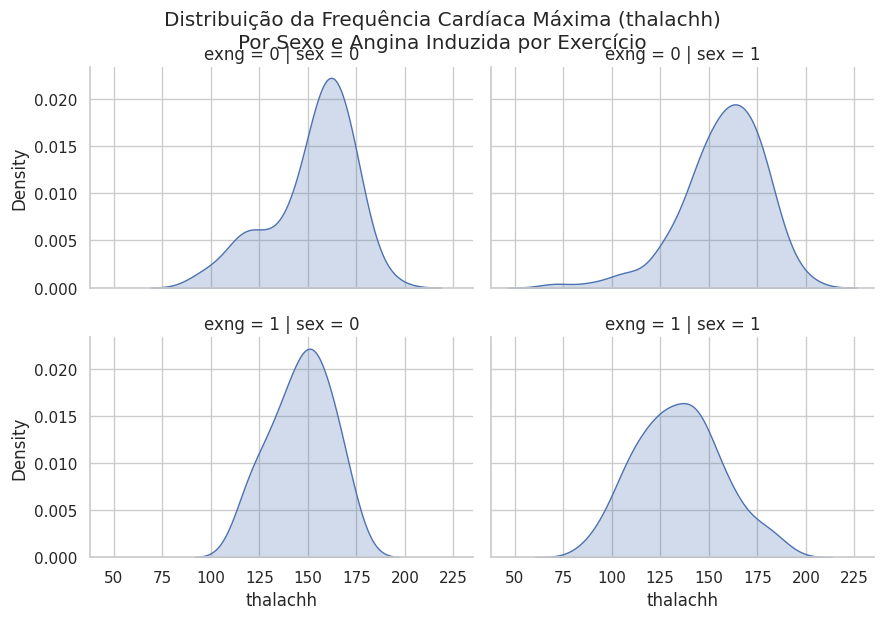

In [6]:
g = sns.FacetGrid(df, col="sex", row="exng", height=3, aspect=1.5)
g.map(sns.kdeplot, "thalachh", fill=True)
g.fig.suptitle("Distribuição da Frequência Cardíaca Máxima (thalachh)\nPor Sexo e Angina Induzida por Exercício", y=1.03)
plt.show()


###5. Crie um plotly.express.scatter_3d

In [7]:
fig = px.scatter_3d(
    df,
    x="chol",
    y="thalachh",
    z="oldpeak",
    color="output",
    title="Relação 3D entre Colesterol, Freq. Cardíaca Máxima e Oldpeak",
    opacity=0.7
)
fig.show()


###Pergunta: Gire o gráfico e identifique se a doença cardíaca é separável em um espaço tridimensional por essas três variáveis.

Resposta: não, mesmo em um espaço tridimensional os outputs se misturam muito (ocupam áreas comuns e muito próximas), não aparece nenhum plano ou perspectiva onde as classes se separem de forma nítida ou linear.

###6. Crie um plotly.express.bar para visualizar a contagem de pacientes por restecg (eletrocardiograma em repouso), e utilize o parâmetro color para diferenciar a variável alvo (output).

In [8]:
fig = px.bar(
    df,
    x="restecg",
    color="output",
    title="Contagem de Pacientes por Tipo de Eletrocardiograma em Repouso (restecg)",
    labels={"restecg": "Tipo de Eletrocardiograma", "count": "Quantidade"}
)

fig.show()


###7. Crie um plotly.express.sunburst ou plotly.express.treemap para visualizar a hierarquia e a contagem de pacientes que têm ou não doença cardíaca (output) com base em dois fatores categóricos: sex e fbs (açúcar no sangue em jejum).

In [12]:
fig = px.sunburst(
    df.assign(
        output_label=df["output"].replace({0: "Sem Doença", 1: "Com Doença"}),
        sex_label=df["sex"].replace({0: "Feminino", 1: "Masculino"}),
        fbs_label=df["fbs"].replace({0: "FBS Normal", 1: "FBS Alto"})
    ),
    path=["output_label", "sex_label", "fbs_label"],
    title="Sunburst: Doença Cardíaca → Sexo → FBS (Açúcar no Sangue em Jejum)",
    color="output",
    labels={
        "output_label": "Doença Cardíaca",
        "sex_label": "Sexo",
        "fbs_label": "FBS (Jejum)"
    }
)
fig.show()

fig2 = px.treemap(
    df.assign(
        output_label=df["output"].replace({0: "Sem Doença", 1: "Com Doença"}),
        sex_label=df["sex"].replace({0: "Feminino", 1: "Masculino"}),
        fbs_label=df["fbs"].replace({0: "FBS Normal", 1: "FBS Alto"})
    ),
    path=["output_label", "sex_label", "fbs_label"],
    title="Treemap: Doença Cardíaca → Sexo → FBS (Açúcar no Sangue em Jejum)",
    color="output",
    labels={
        "output_label": "Doença Cardíaca",
        "sex_label": "Sexo",
        "fbs_label": "FBS (Jejum)"
    }
)

fig2.show()

###8. Utilize a biblioteca de sua preferência para criar um Boxen Plot (sns.boxenplot) ou um gráfico de Raincloud (se souber implementar ou usar uma extensão), focando na variável age (idade) agrupada por caa (número de vasos principais).

/tmp/ipython-input-3789499940.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




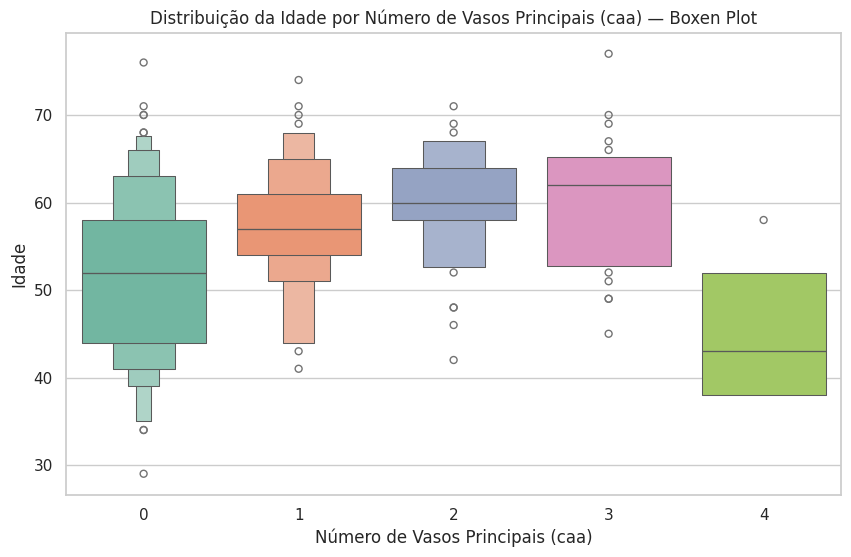

In [13]:
plt.figure(figsize=(10,6))
sns.boxenplot(data=df, x="caa", y="age", palette="Set2")

plt.title("Distribuição da Idade por Número de Vasos Principais (caa) — Boxen Plot")
plt.xlabel("Número de Vasos Principais (caa)")
plt.ylabel("Idade")
plt.show()
